# FitzHugh-Nagumo Time Series

本笔记生成FitzHugh-Nagumo系统的若干序列，随机挑选五条样本，
对每条序列在同一张图中绘制快变量 `v` 与慢变量 `w`，并保持统一的尺度。

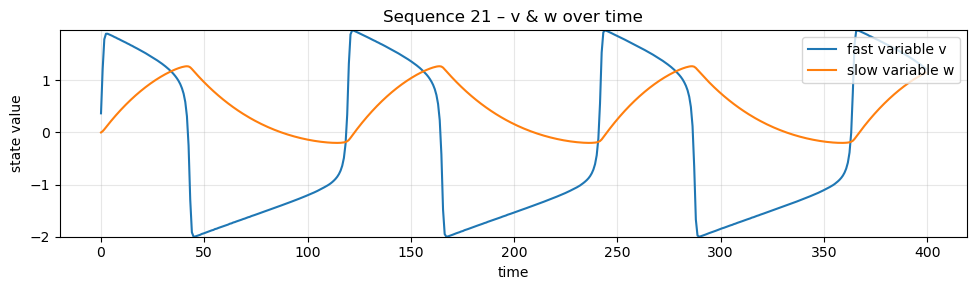

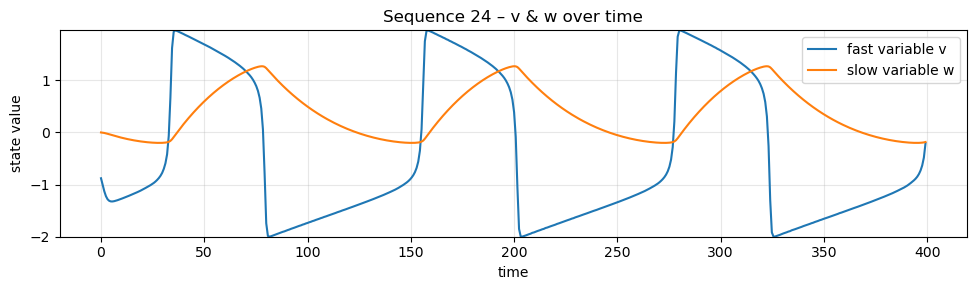

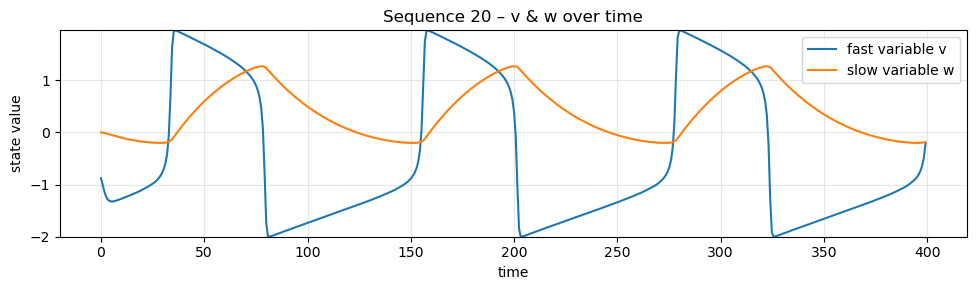

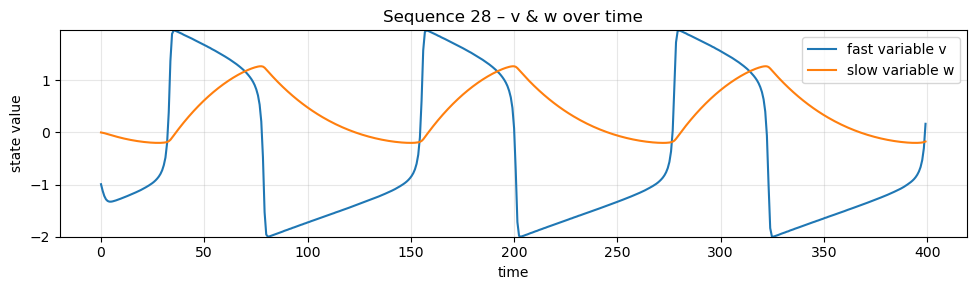

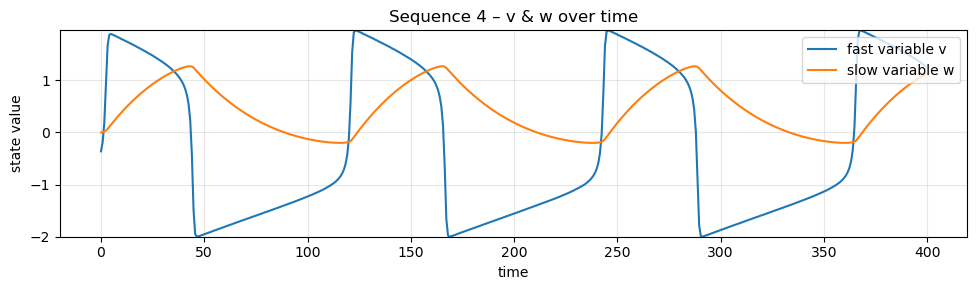

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from data import FHN_rhs

N_SAMPLES = 32
TIME_STEPS = 500
T_SPAN = (0.0, 400.0)
RNG_SEED = 1234

t_eval = np.linspace(T_SPAN[0], T_SPAN[1], TIME_STEPS + 1)
rng = np.random.default_rng(RNG_SEED)

v_sequences = []
w_sequences = []

for _ in range(N_SAMPLES):
    x0 = np.array([rng.random() * 2 - 1, 0.0])
    sol = solve_ivp(FHN_rhs, T_SPAN, x0, t_eval=t_eval)
    v_sequences.append(sol.y[0, :-1])
    w_sequences.append(sol.y[1, :-1])

v_sequences = np.stack(v_sequences)
w_sequences = np.stack(w_sequences)
selected_idx = rng.choice(N_SAMPLES, size=5, replace=False)
time = t_eval[:-1]

# 统一尺度：在被选中的序列中寻找 v 和 w 的全局 min/max
selected_v = v_sequences[selected_idx]
selected_w = w_sequences[selected_idx]
y_min = min(selected_v.min(), selected_w.min())
y_max = max(selected_v.max(), selected_w.max())

for plot_num, idx in enumerate(selected_idx, start=1):
    v = v_sequences[idx]
    w = w_sequences[idx]

    plt.figure(figsize=(10, 3))
    plt.plot(time, v, label='fast variable v', color='tab:blue')
    plt.plot(time, w, label='slow variable w', color='tab:orange')
    plt.title(f'Sequence {idx} – v & w over time')
    plt.xlabel('time')
    plt.ylabel('state value')
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
